**Thinkful - 3.6.4 - Challenge - Predicting Housing Prices**

In [53]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.model_selection import cross_val_score

# Display preferences.
#pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(action="ignore",module="scipy",message="^internal gelsd")

# Grab and process the raw data.
df3 = pd.read_csv('Data/Melbourne_housing_FULL.csv')
#df2 = df3.dropna(subset=['Price'])
df2 = df3.dropna()

# Numerical Variables for Categories
df2['Suburb Code'] = pd.factorize(df2['Suburb'])[0] + 1
df2['Type Code'] = pd.factorize(df2['Type'])[0] + 1
df2['Method Code'] = pd.factorize(df2['Method'])[0] + 1
df2['SellerG Code'] = pd.factorize(df2['SellerG'])[0] + 1
df2['CouncilArea Code'] = pd.factorize(df2['CouncilArea'])[0] + 1
df2['Region Code'] = pd.factorize(df2['Regionname'])[0] + 1
df2.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,Suburb Code,Type Code,Method Code,SellerG Code,CouncilArea Code,Region Code
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,-37.8079,144.9934,Northern Metropolitan,4019.0,1,1,1,1,1,1
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,-37.8093,144.9944,Northern Metropolitan,4019.0,1,1,2,1,1,1
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,-37.8072,144.9941,Northern Metropolitan,4019.0,1,1,3,2,1,1
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,-37.8024,144.9993,Northern Metropolitan,4019.0,1,1,1,2,1,1
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,-37.8060,144.9954,Northern Metropolitan,4019.0,1,1,1,2,1,1


,Distance,Rooms,Postcode,Lattitude,Longtitude,Propertycount,Suburb Code,Type Code,Method Code,SellerG Code,CouncilArea Code,Region Code
Distance,1.000000,0.276585,0.489537,-0.055317,0.163941,-0.003247,0.632399,-0.191034,-0.081262,0.320436,0.670240,0.479761
Rooms,0.276585,1.000000,0.084236,0.018758,0.083016,-0.082797,0.170481,-0.392483,0.039820,0.029597,0.173160,0.168448
Postcode,0.489537,0.084236,1.000000,-0.195081,0.358005,0.032758,0.259538,-0.040114,-0.007835,0.133784,0.259030,0.452979
Lattitude,-0.055317,0.018758,-0.195081,1.000000,-0.345797,0.029793,0.040915,-0.075742,-0.042078,-0.024126,0.057925,-0.510281
Longtitude,0.163941,0.083016,0.358005,-0.345797,1.000000,0.026359,0.073811,0.004048,0.025524,-0.004244,-0.007593,0.416494
Propertycount,-0.003247,-0.082797,0.032758,0.029793,0.026359,1.000000,-0.021052,0.033704,0.001767,-0.003765,-0.043952,-0.185757
Suburb Code,0.632399,0.170481,0.259538,0.040915,0.073811,-0.021052,1.000000,-0.167998,-0.079360,0.310883,0.597335,0.254953
Type Code,-0.191034,-0.392483,-0.040114,-0.075742,0.004048,0.033704,-0.167998,1.000000,0.027828,-0.051029,-0.164097,-0.054830
Method Code,-0.081262,0.039820,-0.007835,-0.042078,0.025524,0.001767,-0.079360,0.027828,1.000000,-0.028278,-0.075614,0.033424
SellerG Code,0.320436,0.029597,0.133784,-0.024126,-0.004244,-0.003765,0.310883,-0.051029,-0.028278,1.000000,0.322556,0.142592


,Price,Rooms,Distance,Postcode,Lattitude,Longtitude,Propertycount,Suburb Code,Type Code,Method Code,SellerG Code,CouncilArea Code,Region Code
2,1035000.0,2,2.5,3067.0,-37.8079,144.9934,4019.0,1,1,1,1,1,1
4,1465000.0,3,2.5,3067.0,-37.8093,144.9944,4019.0,1,1,2,1,1,1
6,1600000.0,4,2.5,3067.0,-37.8072,144.9941,4019.0,1,1,3,2,1,1
11,1876000.0,3,2.5,3067.0,-37.8024,144.9993,4019.0,1,1,1,2,1,1
14,1636000.0,2,2.5,3067.0,-37.8060,144.9954,4019.0,1,1,1,2,1,1


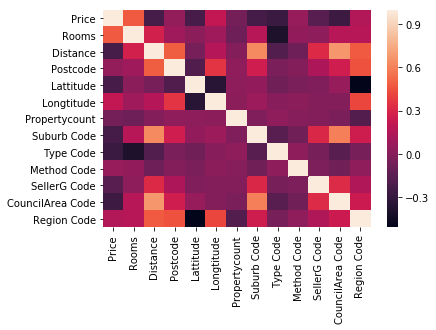

In [54]:
#Create a copy of the dataframe with only the necessary columns
df = df2[['Price','Rooms','Distance','Postcode','Lattitude','Longtitude','Propertycount','Suburb Code',
          'Type Code','Method Code','SellerG Code','CouncilArea Code','Region Code']].copy()

sns.heatmap(df.corr())
correlation_matrix = X.corr()
display(correlation_matrix)
df.head()

In [55]:
Y = df['Price'].values.reshape(-1, 1)
X = df[['Distance','Rooms','Postcode','Lattitude','Longtitude','Propertycount','Suburb Code',
          'Type Code','Method Code','SellerG Code','CouncilArea Code','Region Code']]

**Weighted KNN Regression**

In [68]:
from sklearn import neighbors
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X,Y)

#Inspect results
print("R-squared: ",knn_w.score(X,Y))
score_w = cross_val_score(knn_w, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

R-squared:  0.999994179181
[ 0.32306063  0.40241349  0.26050763  0.21922183  0.35411186  0.42431538
  0.39472506  0.59933881  0.65625729  0.61046054]
Weighted Accuracy: 0.42 (+/- 0.29)


**Linear Regression**

In [57]:
from sklearn import linear_model

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = df['Price']

# Calculate the error, also called the residual.
residual = actual - predicted

df['Predicted'] = pd.Series(predicted, index=df.index)
df['Residual'] = pd.Series(residual, index=df.index)

#Inspect results
score_w = cross_val_score(regr, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


Coefficients: 
 [[ -4.43686392e+04   3.62582446e+05   8.20396083e+02  -9.57628227e+05
    5.18993856e+05   1.18957063e+00  -8.49775299e+02  -2.08274032e+05
   -1.13576964e+04  -5.09437748e+02  -9.56924976e+03   8.28166311e+04]]

Intercept: 
 [ -1.13248991e+08]

R-squared:
0.528990020378
[ 0.53761906  0.61323011  0.52956139  0.440946    0.50815826  0.47855233
  0.40312561  0.49672052  0.51061834  0.55618557]
Weighted Accuracy: 0.51 (+/- 0.11)


**Support Vector Machines**

In [63]:
from sklearn.svm import SVR
Y = df['Price']
svr = SVR()
svr.fit(X,Y)

#Inspect results
print('\nR-squared:')
print(svr.score(X, Y))
score_w = cross_val_score(svr, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


R-squared:
-0.0806172271823
[ -3.25634670e-01  -8.74237971e-02  -7.11265461e-02  -1.94128496e-02
  -6.06308853e-02  -3.98126836e-02  -2.89389528e-04  -1.55151134e-01
  -1.10373196e-01  -1.47803282e-01]
Weighted Accuracy: -0.10 (+/- 0.18)


**Support Vector Machines after PCA**

In [69]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=5)
X_pca = sklearn_pca.fit_transform(X)

svr = SVR()
svr_pca = svr.fit(X_pca,Y)

#Inspect results
print('\nR-squared:')
print(svr_pca.score(X_pca, Y))
score_pca = cross_val_score(svr_pca, X_pca, Y, cv=10)
print(score_pca)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_pca.mean(), score_pca.std() * 2))


R-squared:
-0.0806171518499
[ -3.25636059e-01  -8.74243422e-02  -7.11267868e-02  -1.94124070e-02
  -6.06313783e-02  -3.98105620e-02  -2.87908396e-04  -1.55150636e-01
  -1.10377776e-01  -1.47801680e-01]
Weighted Accuracy: -0.10 (+/- 0.18)


**Gradient Boost Regressor**

In [72]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor()
clf.fit(X,Y)

#Inspect results
print('\nR-squared:')
print(clf.score(X, Y))
score_w = cross_val_score(clf, X, Y, cv=10)
print(score_w)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))


R-squared:
0.760379475086
[ 0.70749479  0.73619903  0.70104577  0.63478891  0.61326838  0.72895959
  0.62335422  0.72622334  0.72700818  0.78280715]
Weighted Accuracy: 0.70 (+/- 0.11)
